In [1]:
# !pip install streamlit

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import streamlit as st

In [3]:
df1 = pd.read_pickle("data/taishi.pkl")
df2 = pd.read_pickle("data/bb.pkl")

In [20]:
markdown = """
### プロ野球選手の年俸のヒストグラム
2020年のプロ野球選手の年俸からヒストグラムを作成しました
"""
st.write(markdown)

2022-11-20 14:38:55.803 
  command:

    streamlit run /opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [5]:
df2 = df2[df2["年俸"]!="#VALUE!"]
df2 = df2.reset_index(drop=True)

In [6]:
df2["年俸"] = df2["年俸"].apply(lambda x:x.replace(",",""))

In [7]:
df2["年俸"] = df2["年俸"].astype('int')

In [8]:
df2["年俸"] = df2["年俸"].apply(lambda x: x/10000)

In [9]:
bins = np.linspace(0, df2["年俸"].max(), 91)

[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000. 25000. 26000. 27000. 28000. 29000.
 30000. 31000. 32000. 33000. 34000. 35000. 36000. 37000. 38000. 39000.
 40000. 41000. 42000. 43000. 44000. 45000. 46000. 47000. 48000. 49000.
 50000. 51000. 52000. 53000. 54000. 55000. 56000. 57000. 58000. 59000.
 60000. 61000. 62000. 63000. 64000. 65000. 66000. 67000. 68000. 69000.
 70000. 71000. 72000. 73000. 74000. 75000. 76000. 77000. 78000. 79000.
 80000. 81000. 82000. 83000. 84000. 85000. 86000. 87000. 88000. 89000.
 90000.]


In [10]:
freq = df2["年俸"].value_counts(bins=bins, sort=False)

(-0.001, 1000.0]      412
(1000.0, 2000.0]      180
(2000.0, 3000.0]       90
(3000.0, 4000.0]       38
(4000.0, 5000.0]       29
                     ... 
(85000.0, 86000.0]      0
(86000.0, 87000.0]      0
(87000.0, 88000.0]      0
(88000.0, 89000.0]      0
(89000.0, 90000.0]      1
Name: 年俸, Length: 90, dtype: int64

In [12]:
class_value = (bins[:-1] + bins[1:]) / 2  # 階級値
rel_freq = freq / df2["年俸"].count()  # 相対度数
cum_freq = freq.cumsum()  # 累積度数
rel_cum_freq = rel_freq.cumsum()  # 相対累積度数

2022-11-20 13:37:26.287 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-11-20 13:37:26.288 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [13]:
pd.set_option('display.max_rows', 101)

In [1]:
dist = pd.DataFrame(
    {
        "階級値(万円)": class_value,
        "度数(人数)": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
)
st.dataframe(dist)

NameError: name 'pd' is not defined

2022-11-20 14:40:07.884 No handles with labels found to put in legend.


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

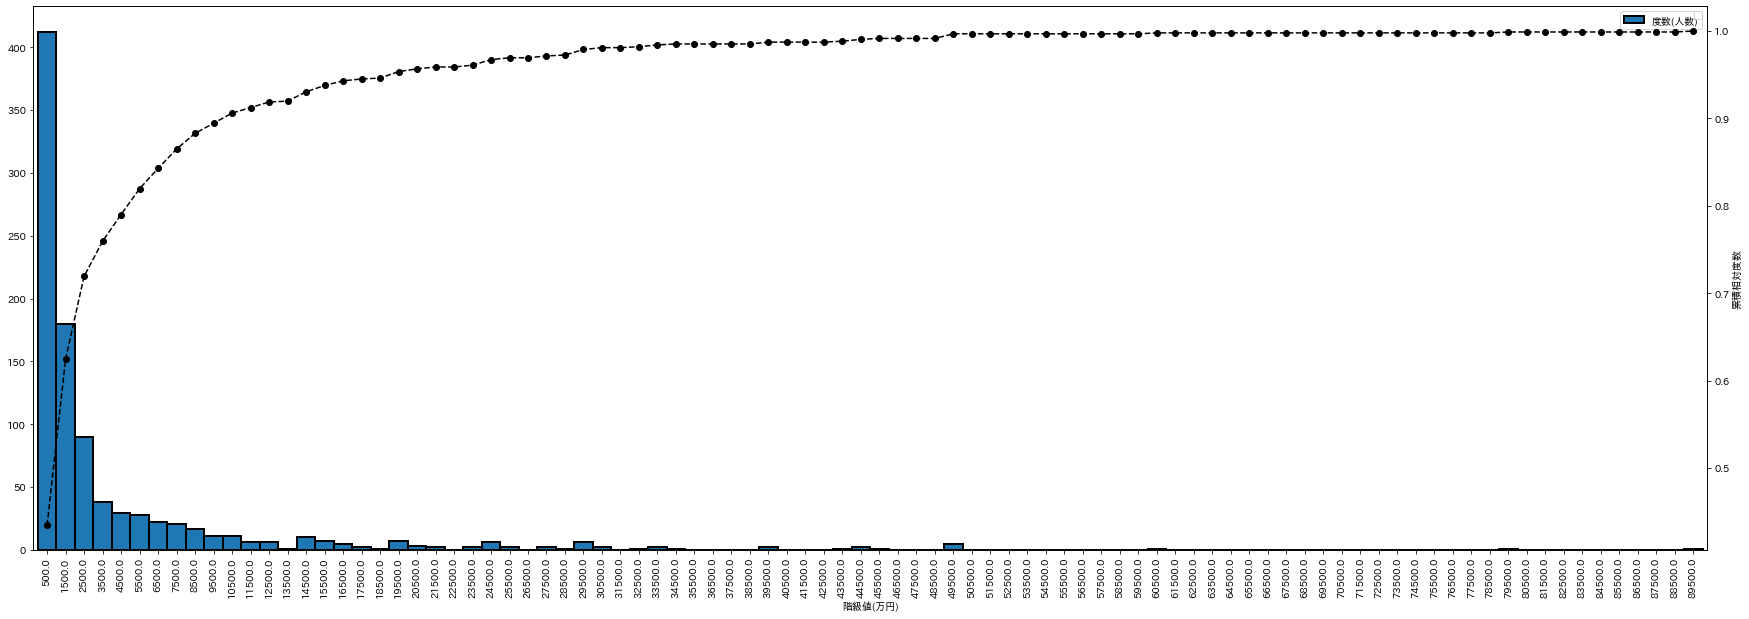

In [21]:
fig, ax1 = plt.subplots(figsize=(30, 10))
dist.plot.bar(x="階級値(万円)", y="度数(人数)", ax=ax1, width=1, ec="k", lw=2)

ax2 = ax1.twinx()
ax2.plot(np.arange(len(dist)), dist["相対累積度数"], "--o", color="k")
ax2.set_ylabel("累積相対度数")
ax2.legend()
st.pyplot(fig)

## ローレンツ曲線

In [16]:
df2["年俸"].mean()

4323.416666666667

In [17]:
df2["年俸"].mode()

0     500.0
1     700.0
2    1600.0
dtype: float64

## 共分散

In [18]:
df1.cov()

,統率,武勇,知略,内政,外政,戦闘,政治,合計,寿命,野心,父親有無,母親有無,志区分
統率,232.251889,165.230655,125.409947,58.615645,93.242228,397.482544,151.857873,674.750364,9.629711,-0.556402,0.426908,0.149511,0.832946
武勇,165.230655,228.434036,79.231777,-15.678781,18.937641,393.664691,3.258860,476.155329,4.249117,-3.798908,0.169840,0.069912,0.625525
知略,125.409947,79.231777,201.996998,120.000469,176.271217,204.641724,296.271686,702.910409,40.083320,3.120678,-0.240918,0.120573,0.706040
内政,58.615645,-15.678781,120.000469,237.935376,211.373856,42.936865,449.309232,612.246566,40.653353,2.008787,0.635580,0.150248,0.549221
外政,93.242228,18.937641,176.271217,211.373856,233.563388,112.179869,444.937244,733.388330,46.590258,2.921262,0.223123,0.136564,0.621799
戦闘,397.482544,393.664691,204.641724,42.936865,112.179869,791.147236,155.116733,1150.905693,13.878828,-4.355310,0.596748,0.219423,1.458471
政治,151.857873,3.258860,296.271686,449.309232,444.937244,155.116733,894.246476,1345.634896,87.243611,4.930050,0.858703,0.286813,1.171020
合計,674.750364,476.155329,702.910409,612.246566,733.388330,1150.905693,1345.634896,3199.450997,141.205758,3.695418,1.214533,0.626808,3.335530
寿命,9.629711,4.249117,40.083320,40.653353,46.590258,13.878828,87.243611,141.205758,271.619779,15.831278,-1.515286,-0.045068,0.023067
野心,-0.556402,-3.798908,3.120678,2.008787,2.921262,-4.355310,4.930050,3.695418,15.831278,48.743469,-0.032765,-0.002310,0.189622
